### HW4. Author Andrii Zadaianchuk

In [1]:
import numpy as np
from naive import NaiveBayesModel
from naive import MyNaiveBayesModel
from logistic import LogisticRegressionModel
from util import load_data

In [2]:
clfLR=LogisticRegressionModel()
clfNB=NaiveBayesModel()
clfNB2=MyNaiveBayesModel()

In [3]:
(X,y,X_test,y_test)=load_data()

In [5]:
accuracy=np.zeros((20,10,3))
for j in range(20):
    ind=np.random.permutation(X.shape[0])
    for (i,k) in enumerate([2**n for n in range(3,13) ]):     
        clfLR=LogisticRegressionModel()
        clfNB=NaiveBayesModel()
        clfNB2=MyNaiveBayesModel()
        X_part=X[ind[:k],:]
        y_part=y[ind[:k]]
        clfLR.fit(X_part,y_part)
        clfNB.fit(X_part,y_part)
        clfNB2.fit(X_part,y_part)
        accuracy[j,i,:]=(clfLR.accuracy(X_test,y_test),clfNB.accuracy(X_test,y_test),clfNB2.accuracy(X_test,y_test))

I've program one more model, where I've estimated conditional probability of word given a topic $P(word|y=0)$, using conditional independence I've dot that $\hat{P}(x_i|y=0)=\frac{\# word_i}{ \sum \# word_j | y_J=0}$

It is not the same as was in pdf with discription of Naive Bayes, but worked better so I included the results of this algorithm too

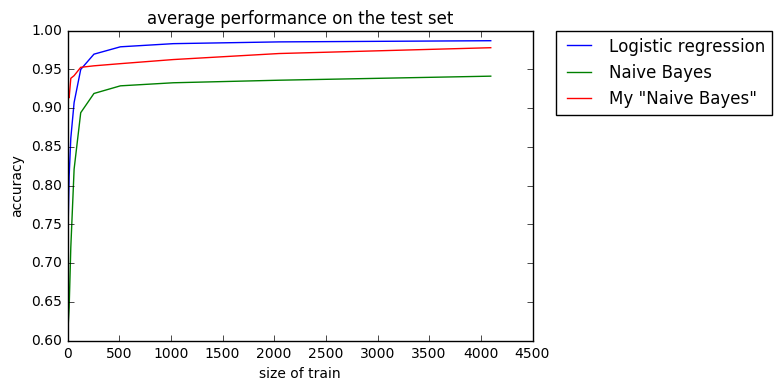

In [7]:
import matplotlib.pyplot as plt
size_of_train=[2**n for n in range(3,13) ]
plt.plot(size_of_train,accuracy.mean(axis=0))
plt.title('average performance on the test set')
plt.xlabel('size of train')
plt.ylabel('accuracy')
plt.legend(['Logistic regression','Naive Bayes','My "Naive Bayes"'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
